# Entropy: Expected Differences
## The Transmitter (Again): Efficient Encoding

In [48]:
#| include: false

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
#| echo: false

import warnings
warnings.filterwarnings('ignore')

In [50]:
#| echo: false
from IPython.display import HTML

with open('../html/shannon_diagram_transmitter.html', 'r', encoding='utf-8') as f:
    noisy_channel_transmitter_html = f.read()

Recall where we left off in the previous part: We were converting outputs from a stochastic process, such as the outcomes from the toss of a fair coin, to bits. This is what the **transmitter** does in the Noisy Channel of Shannon, as seen in the figure below. 

In [51]:
#| echo: false
HTML(noisy_channel_transmitter_html)

While we have seen how to represent words with bits, the question that really occupied Shannon was how to do this in the most efficient manner. The bit was simply a byproduct of this preoccupation, a the minimal representation of events that could provide the best stepping stone towards efficiency. This quest for efficient transmission was partly a legacy of the work Shannon took up from his predecessors at Bell Labs, and partly an outcome from the renewed and acute interest in cryptography that arose during World War II.

:::{.column-margin}
> The action of the transmitter in changing the message into the signal often involves a coding process. What are the characteristics of an efficient coding process?

Weaver, W. (1953). Recent contributions to the mathematical theory of communication. *ETC: A Review of General Semantics*, 10(4), 261–281.
:::

It is this drive for efficiency that underlies the mathematical concept of **information entropy**. 

To make sense of information entropy, let's return to the unbiased coin that we used in the previous part. We already know we need on average one bit to encode the outcome, 0 or 1, "yes" or "no", "heads" or "tails". But what if we wanted to calculate this value just from knowing the probabilities $P(H)$ for heads and $P(T)$ for tails?

$$
P(H) = \frac{1}{2} \;\;\;
P(T) = \frac{1}{2}
$$

Remember, that we can take the $\log_2$ of a probability to know how many bits we need to represent it. If we take the log of these, we get:
    
$$
\log_2\frac{1}{2} + \log_2\frac{1}{2} = \\
-1 + (-1) = \\ 
-2
$$

But that magnitude is too large! And the number is negative! We know the bits to encode a fair coin is one. What we need to do is to weigh each event in our distribution by it's probability to get not just a sum but a **"weighted sum"**. 
$$
\begin{equation*}
\begin{aligned}
\left(\frac{1}{2}\times\log_2\frac{1}{2}\right) + \left(\frac{1}{2}\times\log_2\frac{1}{2}\right) &= \\
\left(\frac{1}{2}\times(-1)\right) + \left(\frac{1}{2}\times(-1)\right) &= \\
-\frac{1}{2} -\frac{1}{2} &= -1
\end{aligned}
\end{equation*}
$$



Better! But still negative. What we do is just reverse the sign of the equation, like this:

:::{.column-margin}
> In retrospect, identifying entropy with information [...] allowed entropy to be reconceptualized as the thermodynamic motor driving systems to self-organization rather than as the heat engine driving the world to universal heat death. (p. 102)

Hayles, N. K. (1998). *How We Became Posthuman: Virtual Bodies in Cybernetics, Literature, and Informatics*. University of Chicago Press.
:::

$$
\begin{equation*}
\begin{aligned}
-1 \times \left[\left(\frac{1}{2}\times\log_2\frac{1}{2}\right) + \left(\frac{1}{2}\times\log_2\frac{1}{2}\right)\right] &= \\
-1 \times \left[\left(\frac{1}{2}\times(-1)\right) + \left(\frac{1}{2}\times(-1)\right)\right] &= \\ 
-1 \times \left[-\frac{1}{2} -\frac{1}{2}\right] = \\
-1 \times (-1) &= 1
\end{aligned}
\end{equation*}
$$

We can actually use this to take a stab at a first definition of **information entropy**. Following a convention established by Shannon, we will use the symbol $\mathbb{H}$. In fact, this reversal of signs is the biggest difference in how Claude Shannon and Norbert Wiener defined information. Whereas Wiener opposed entropy and information, Shannon equated them. In one narrative, information is a measure of order, in the other one, a measure of disorder.

### The Definition of Information Entropy

So let's imagine a *random variable* $X$ with two outcomes $x_1$ and $x_2$ and let's for simplicity's sake say they have probabilities $p_1$ and $p_2$. Then, the information entropy is:

:::{.column-margin}
A **random variable** assigns a number to each outcome of a random process $X$. For example, a coin flip can map "heads" to 1 and "tails" to 0, or a die roll can map each face to its number. In the former case, the possible outcomes are $x_1$ and $x_2$, in the latter $x_1$ through $x_6$. The probability distribution $P(X)$ of a random variable describes the set of probabilities $P(x_i)$ or $p_i$ of each possible value. So, in the case of a toss of a fair coin, $p_1=0.5$ and $p_2=0.5$.
:::

$$
\mathbb{H}(X) = -(p_1 \log_2 p_1 + p_2 \log_2 p_2)
$$

And we can actually generalize this to a case with any number of outcomes and with any probability values, like this:
    
$$
\begin{equation}
  \mathbb{H}(X) = -\overbrace{\sum_{i=1}^N P(x_i)}^\text{Weighted sum} \underbrace{\log_2 P(x_i)}_\text{Bits}
\end{equation}
$$

Let's unpack again.

1) First, the intimidating symbol $\sum_{i=1}^N$ just states that we sum over all the probabilities in our distribution, with $N$ outcomes $x_i$, each of them indexed with $i$. It's like going over all the values in a list of length $N$ in a for-loop and adding them (for multiplication, we would instead use the symbol $\prod$). Because we are summing probabilities, what we get is a weighted sum, just like we wanted.

2) Second, we calculate the bits required to encode each outcome. This we already went over above.

3) Third, we take the negative value of the whole thing, because the logarithms of fractions are negative (and probabilities are always fractions, except at 0 and 1) and we want the actual bits, not a negative value.

4) The $(X)$ after $\mathbb{H}$ just says that we are going over an entire distribution, i.e. all possible outcomes of our "random variable".

**PROMPT:** How would you code entropy if you were to use a for loop? **Hint:** You will need to use ```np.log2```

Now, let's wrap that calculation in a function. $\log_2 0$ is undefined, so we need to handle that separately.

In [52]:
#| echo: false

import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
from matplotlib import pyplot as plt

In [53]:
#| echo: false

import sys
sys.path.append('../py')

from plots import (
 plot_entropy, plot_symbol_probs
)

sns.set_style("ticks")

In [54]:
#| code-fold: true

def entropy_as_loop(prob_dist):
    entropy = 0
    for p in prob_dist:
        if not p.item() == 0.0:
            entropy += p * np.log2(p)
        else:
            entropy += 0
    return -entropy

Next, we will go over all these distributions and get the entropy for each of them. Just like in the previous part, we will need a list of distributions. This time we'll create 100 pairs, instead of just 10.

In [55]:
p_heads = np.linspace(0, 1, 100)
p_tails = 1 - p_heads

In [56]:
prob_distributions = list(zip(p_heads, p_tails))
[(pd[0].item(), pd[1].item()) for pd in prob_distributions][:3]

[(0.0, 1.0),
 (0.010101010101010102, 0.98989898989899),
 (0.020202020202020204, 0.9797979797979798)]

**PROMPT** Get the entropy for each distribution in `prob_distributions`. Save the output as a `list`. 
**Remember:** Each tuple in this list is a probability distribution.

In [57]:
#| code-fold: true

coin_entropies = [entropy_as_loop(p_dist) for p_dist in prob_distributions]

We can use a helper function to plot the entropy relative to the probability of heads in each distribution.

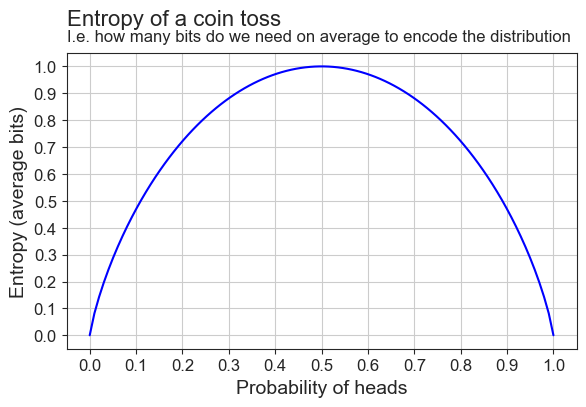

In [58]:
plot_entropy(coin_entropies)

We can also write our function in numpy, without the for-loop. It's a good exercise to do this, because for these types of functions people will rarely use for-loops.

**PROMPT:** Re-write the entropy function in `numpy`. <br>
**Hints:** 

- It's one line of code for the entropy itself, but...
- ... if you want to handle the zeroes (you don't have to), you can do this:

In [59]:
p = np.array([0,1])
p = p[p > 0]
p.item()

1

In [60]:
#| code-fold: true

def entropy_np(p):
    p = np.array(list(p))
    p = p[p > 0]
    return -np.sum(p * np.log2(p))

Let's plot it to make sure it's the same as the for-loop version.

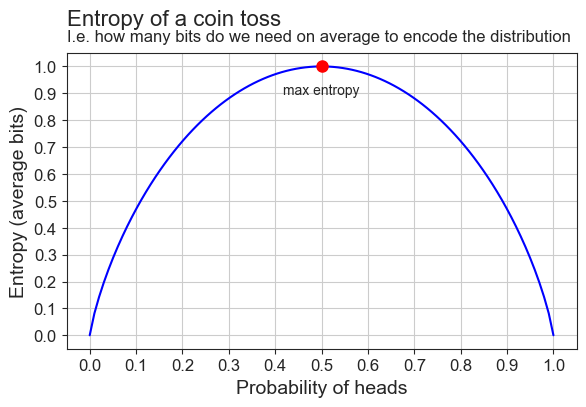

In [61]:
coin_entropies = [entropy_np(prob_dist) for prob_dist in prob_distributions]

plot_entropy(coin_entropies, True)

 And indeed it is! We've also added a red dot to highlight where the entropy as it's highest. 

:::{.column-margin}
> [W]hite noise has the maximum possible entropy. (p. 632)

Shannon, C. E. (1948). A Mathematical Theory of Communication. *The Bell System Technical Journal*, 27(3), 379–423. [[URL]](https://doi.org/10.1002/j.1538-7305.1948.tb01338.x)

:::

 - It's the point where $P(H)=0.5=P(T)$.
 - This is where the distribution is uniform. 
 - This is why Weaver and Shannon called this least informative distribution the **"maximum entropy"** distribution.

Why is entropy maximized where the distribution is uniform? Because this is where there is no structure, no *redundancy*. At this point, all events are equally likely: The coin is fair, the language is just random letters. This hightlights Shannon's idea that information measures **suprise**. When there is no structure, all events are equally surprising, so "average surprise" is maximized!

Entropy is *not* at it's highest where probability is at it's highest, because:

1) Probability measures the properties of *individual* events
2) Information entropy measures the properties of *entire distributions*

If we continue the definition that Bateson gives for bits of information as "the difference which makes a difference", information entropy is "average difference" or, in more statistical terms, "expected difference". Instead of defining the individual differences that determine outcomes, information entropy measures the average amount of such differences in a given process.

:::{.column-margin}
We call averages "expected values" because they represent the long-run average outcome if we repeat the process many times. For example, the average of a die roll is 3.5—not a possible single roll, but the average over many rolls. "Expected" here means the value we expect on average, not a guaranteed outcome. It's the center of the distribution, the number outcomes tend toward with repeated trials.
:::

## Bits for (a very simple) Language

So far, we have used the coin toss as a scaffolding to understand bits and entropy. Let's now return to our main subject of interest, which is the relationship between information theory and language modelling. We define a simple, artificial language with only four letters, all equally probable. The letters are our unknown uniform random variable $X$ with outcomes $x_i$:

$$
x_1 = A, \; x_2 = B, \; x_3 = C, \; x_4 = D
$$

They also have corresponding probabilities, so that:

$$
p(x_1) = 0.25, \; p(x_2) = 0.25, \; p(x_3) = 0.25, \; p(x_4) = 0.25
$$

In code, we can define the letters and their corresponding probabilities as:

In [62]:
language = ['A', 'B', 'C', 'D']
uniform_probs = [0.25]*4
uniform_probs

[0.25, 0.25, 0.25, 0.25]

Let's plot the language as a distribution:

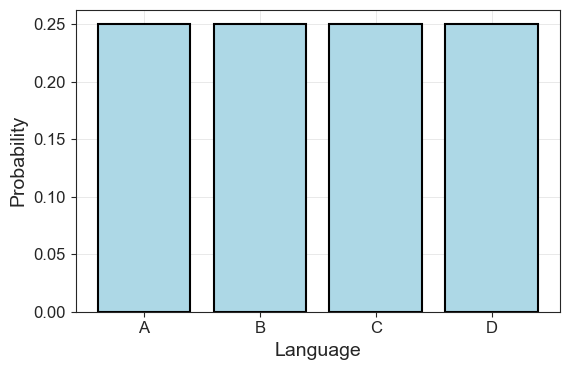

In [63]:
plot_symbol_probs(uniform_probs, language)

Our language has a uniform distribution, so each bar goes up to 0.25. We've seen this type of event before: When we were tossing our fair coin two times, we had four possible outcomes, just like now. In this instance, the average bits we needed to encode those outcomes were $1$. 

Let's see if that's true now as well:

In [64]:
entropy_np(uniform_probs).item()

2.0

No surprises here. Or, from Shannon's perspective, **only surprises**! Each outcome requires two bits to encode, and hence the average is also two. To clarify, we can re-write our code for the bit table to include the probability of the events.

In [65]:
def print_bit_table(outcome, bits, probs):
    n_bits = [len(b) for b in bits]
    
    return pd.DataFrame(
        {'outcomes':outcome, 
         'bits':bits, 
         'n_bits':n_bits,
         'prob':np.round(probs, 3).astype(str)
        }).style.hide()

In [66]:
uniform_bits = ['00', '01', '10', '11']
print_bit_table(language, uniform_bits, uniform_probs)

outcomes,bits,n_bits,prob
A,00,2,0.25
B,01,2,0.25
C,10,2,0.25
D,11,2,0.25


But what if our language instead had the following probabilities:
    
$$
\begin{aligned}
p(x_1) &= 0.5 \\
p(x_2) &= 0.25 \\
p(x_3) &= 0.125 \\
p(x_4) &= 0.125
\end{aligned}
$$

We start, once again, by defining our outcomes and their probabilities, and plotting for clarity.

In [67]:
language = ['A', 'B', 'C', 'D']
lang_probs = [0.5, 0.25, 0.125, 0.125]
sum(lang_probs)

1.0

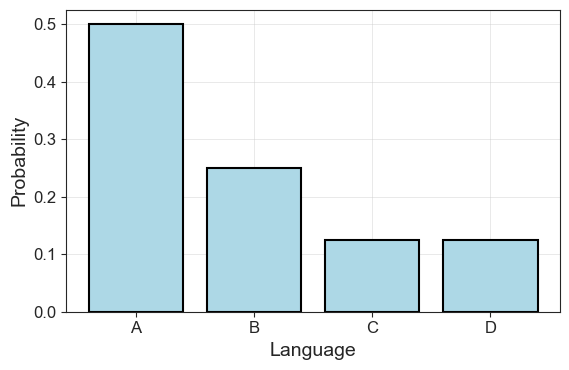

In [68]:
plot_symbol_probs(lang_probs, language)

Looks familiar? Well, we've just created a language that seems to (roughly) follow Zipf's Law. It's more simple than an actual language to make analysis easier, but the idea is the same. We can import the functions we used in the first part and load the "Alice in Wonderland text" to illustrate the point.

In [69]:
from plots import plot_word_dist
from utils import (
    tokens_from_gutenberg_text, get_probs_from_counter
)

In [70]:
alice_tokens = tokens_from_gutenberg_text('carroll-alice.txt')
alice_counts = Counter(alice_tokens)
alice_probs = get_probs_from_counter(alice_counts)

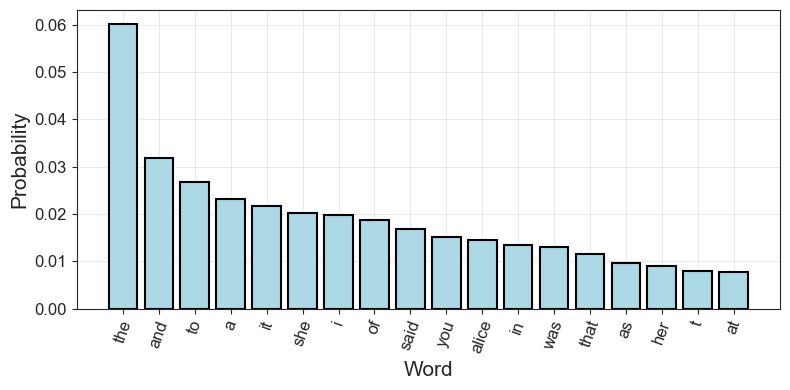

In [71]:
plot_word_dist(alice_probs)

Returning to our artificial language $A, B, C, D$, if we want to encode this language in bits, how do we go about it? Well, for starters we know how many bits we need on average. That knowledge is provided by our entropy function.

In [72]:
lang_entropy = entropy_np(lang_probs)
lang_entropy.item()

1.75

But we know more than that — each outcome needs a number of bits that corresponds to its probability:

$$
\begin{aligned}
\text{bits for } A &= -\log p(A) = -\log\frac{1}{2} = 1 \\
\text{bits for } B &= -\log p(B) = -\log\frac{1}{4} = 2 \\
\text{bits for } C &= -\log p(C) = -\log\frac{1}{8} = 3 \\
\text{bits for } D &= -\log p(D) = -\log\frac{1}{8} = 3
\end{aligned}
$$

Does this work? Let's try!

**PROMPT:** Calculate how many bits we have on average, if we weigh each by their corresponding probability.

In [ ]:
#| code-fold: true

average_bits = (0.5 * 1 + 0.25 * 2 + 0.125*3 + 0.125*3)
average_bits

1.75

It matches the entropy! Let's make that into a function. We will compare the output from our function with our `average_bits` to make sure they do the same thing.

In [83]:
def average_bits(probs, n_bits):
    return np.sum(np.multiply(probs, n_bits))

n_lang_bits = [1,2,3,3]
(average_bits(lang_probs, n_lang_bits) == entropy_np(lang_probs)).item()

True

If we output our bit table with these values, we see what such an encoding could look like.

**PROMPT** Create the list lang_bits with four entries. Make these correspond to the bits each letter should have:

$$
\begin{aligned}
A & : 1 \\
B & : 2 \\
C & : 3 \\
D & : 3
\end{aligned}
$$

In [ ]:
#| code-fold: true

lang_bits = ['0', '10', '110', '111']
print_bit_table(language, lang_bits, lang_probs)

outcomes,bits,n_bits,prob
A,0,1,0.5
B,10,2,0.25
C,110,3,0.125
D,111,3,0.125


Next, we will move on to the movement *across* the noisy channel, from **transmitter** to **receiver** and see how that passage has inspired such modern evaluation metrics in machine learning as the Kullback-Leibler or $\mathbb{KL}$ divergence and cross-entropy loss.